# Esercizio 1

Scrivere un algoritmo per generare numeri pseudo casuali con distribuzione multinomiale
B(1, 1/4, 1/2, 1/4). Generare 2000 di questi numeri e costruire un istogramma verificando l’accordo con la distribuzione teorica di probabilità


In [225]:
import numpy as np
import matplotlib.pyplot as plt


def rand_multi(p):
    F = np.cumsum(p)
    xi = np.random.rand()
    X = np.nonzero(xi < F)[0][0] + 1
    return X

In [226]:
p = np.array([1 / 4, 1 / 2, 1 / 4])

N = 2000
X = np.zeros(N)

for i in range(N):
    X[i] = rand_multi(p)

m = p.size
F = np.zeros(m)
for i in range(m):
    F[i] = np.sum(X == i + 1)

print(F)
print(np.sum(F))

[ 467. 1000.  533.]
2000.0


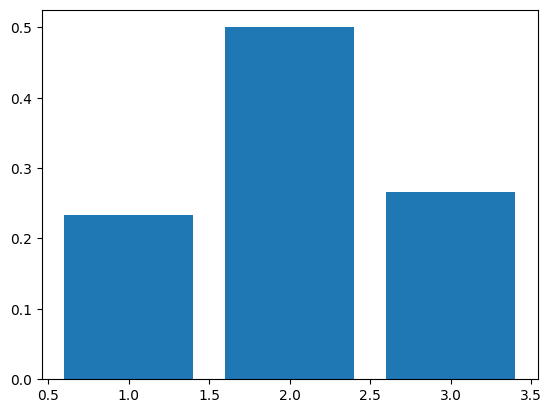

In [227]:
x = np.arange(m) + 1
F = F / np.sum(F)
plt.bar(x, F)
plt.show()

# Esercizio 2

Si scrivano delle funzioni di Python per generare numeri random con distribuzione
U([−1, 1]), EXP(3), N(1, 2), χ2(5).

Si generino N = 1000 di questi numeri e si confrontino i risultati con le distribuzioni teoriche mediante istogramma e mediante grafico quantile-quantile.


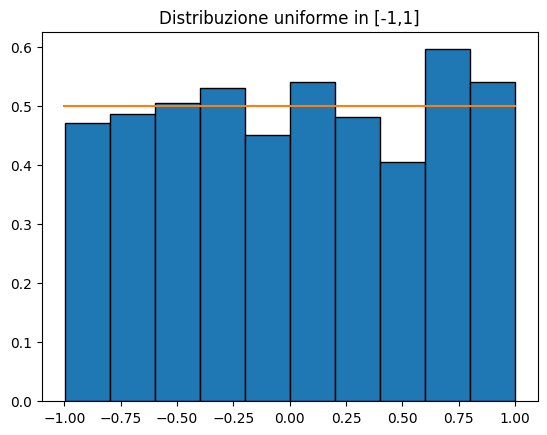

In [228]:
import numpy as np
import matplotlib.pyplot as plt

# Distribuzione uniforme U(-1,1)
from scipy.stats import uniform

a, b = -1, 1
N = 1000

X = np.random.rand(N)
Y = a + X * (b - a)

assex = np.linspace(a, b, 1000)
assey = uniform.pdf(assex, a, b - a)

plt.hist(Y, density=True, edgecolor="black")
plt.plot(assex, assey)
plt.title("Distribuzione uniforme in [-1,1]")
plt.show()

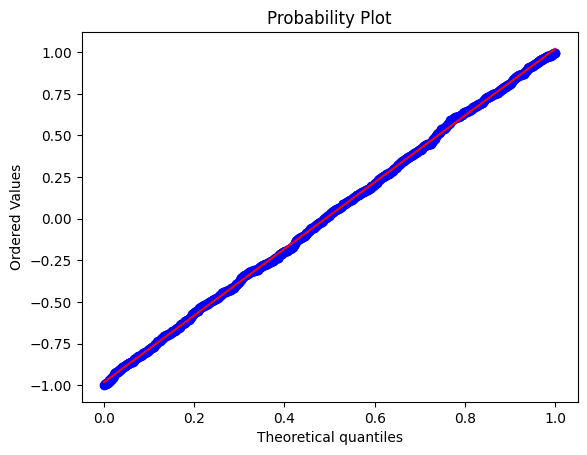

In [229]:
from scipy.stats import probplot

probplot(Y, dist=uniform, plot=plt)
plt.show()

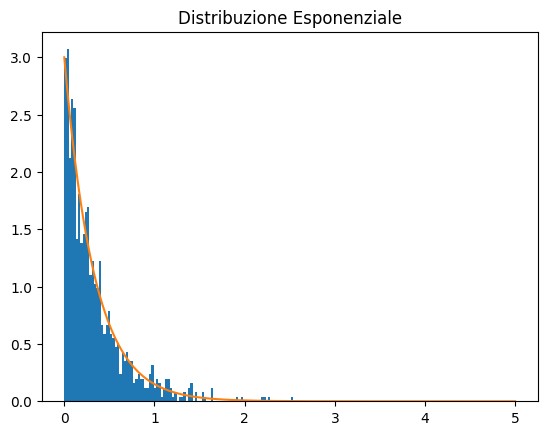

In [230]:
# Distribuzione esponenziale EXP(3)
from scipy.stats import expon

lam = 3
N = 1000
X = np.random.rand(N)
Y = -np.log(X) / lam

assex = np.linspace(0, 5, 1000)
assey = expon.pdf(assex, 0, 1 / lam)

plt.hist(Y, bins=100, density=True)
plt.plot(assex, assey)
plt.title("Distribuzione Esponenziale")
plt.show()

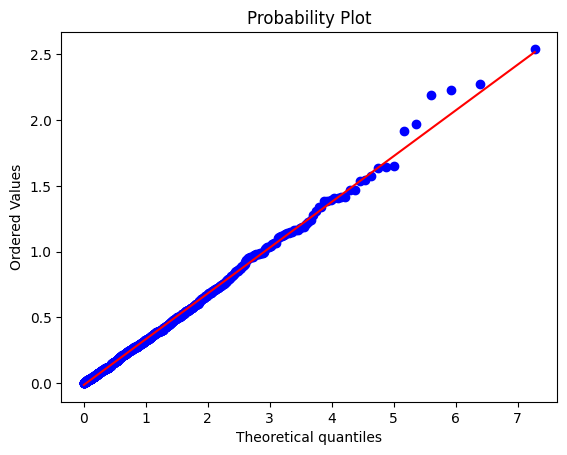

In [231]:
probplot(Y, dist=expon, plot=plt)
plt.show()

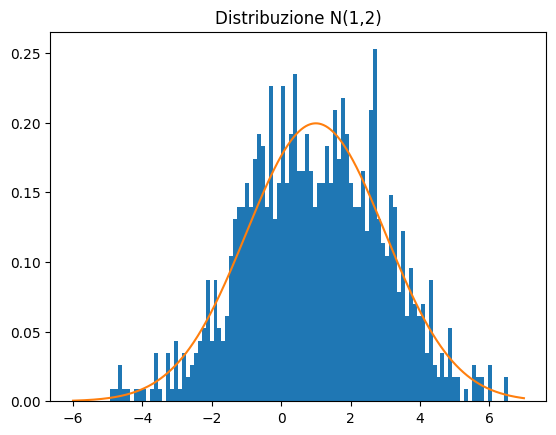

In [232]:
# Distribuzione Normale N(1,2)
from scipy.stats import norm

mu = 1
sigma = 2
N = 1000

X = np.random.rand(N)

xi1 = X[0 : int(N / 2)]
xi2 = X[int(N / 2) : N]

eta1 = np.sqrt(-2 * np.log(xi1)) * np.cos(2 * np.pi * xi2)
eta2 = np.sqrt(-2 * np.log(xi1)) * np.sin(2 * np.pi * xi2)

Y = np.zeros(N)
Y[0 : int(N / 2)] = mu + sigma * eta1
Y[int(N / 2) : N] = mu + sigma * eta2

assex = np.linspace(-6, 7, 1000)
assey = norm.pdf(assex, loc=1, scale=2)

plt.hist(Y, bins=100, density=True)
plt.plot(assex, assey)
plt.title("Distribuzione N(1,2)")
plt.show()

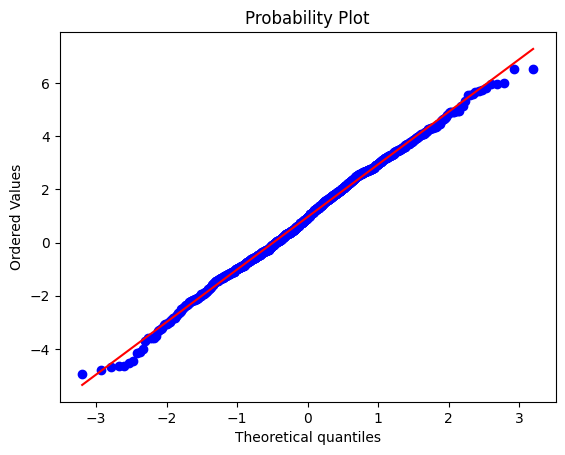

In [233]:
probplot(Y, dist=norm, plot=plt)
plt.show()

# Esercizio 3

Generare numeri pseudo-casuali con distribuzione

f(x) = 1 + cos(x)/2π con x ∈ [−π, π].

Eseguire un confronto statistico tra i numeri generati e la distribuzione teorica.


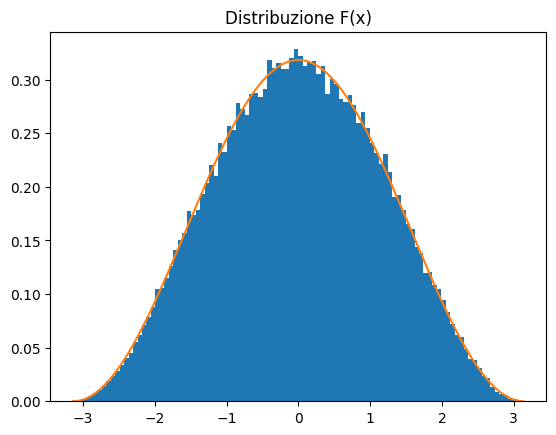

In [234]:
import numpy as np


def fun(x):
    y = (1 + np.cos(x)) / (2 * np.pi)
    return y


def rigetto(a, b, M):
    while True:
        r1 = np.random.rand()
        r2 = np.random.rand()
        xi = a + r1 * (b - a)
        eta = M * r2
        if eta <= fun(xi):
            break
    return xi


a = -np.pi
b = np.pi
M = 1 / np.pi

N = 100000
X = np.zeros(N)
for i in range(N):
    X[i] = rigetto(a, b, M)

assex = np.linspace(a, b, 1000)
assey = fun(assex)

plt.hist(X, bins=100, density=True)
plt.plot(assex, assey)
plt.title("Distribuzione F(x)")
plt.show()

# Esercizio 4

Sia X ∼ N(0, 1). Si calcoli numericamente con il metodo hit or miss la probabilità
p = P(0.5 ≤ x ≤ 2).


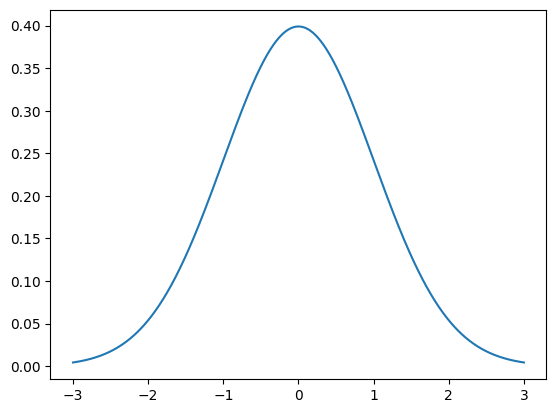

In [235]:
import numpy as np


def fun(x):
    y = np.exp(-(x**2) / 2) / np.sqrt(2 * np.pi)
    return y


a, b = 0.5, 2

assex = np.linspace(-3, 3, 1000)
assey = norm.pdf(assex)
plt.plot(assex, assey)
plt.show()

In [236]:
M = 0.45
N = 100000
NS = 0

for i in range(N):
    r1 = np.random.rand()
    r2 = np.random.rand()
    xi = a + r1 * (b - a)
    eta = r2 * M
    if fun(xi) > eta:
        NS = NS + 1

p = NS / N
I = p * M * (b - a)

phi = norm.cdf(b) - norm.cdf(a)

0.2857874067778077
